In [38]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Set the ticker symbols for NASDAQ and NSE indices
nasdaq_ticker = "^IXIC"  # NASDAQ
nse_ticker = "^NSEI"     # NSE

# Collect historical data for NASDAQ
nasdaq_data = yf.download(nasdaq_ticker, start="2010-01-01", end="2023-06-01")

# Collect historical data for NSE
nse_data = yf.download(nse_ticker, start="2010-01-01", end="2023-06-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [39]:
# Extract the 'Close' prices from the data
nasdaq_close = nasdaq_data['Close']
nse_close = nse_data['Close']

In [40]:
# Create a DataFrame with the two series
data = pd.DataFrame({'NASDAQ': nasdaq_close, 'NSE': nse_close})

# Compute the lagged returns for NASDAQ and NSE
data['NASDAQ_Return'] = data['NASDAQ'].pct_change()
data['NSE_Return'] = data['NSE'].pct_change()

# Find the correlation between lagged returns
correlation = data['NASDAQ'].corr(data['NSE'])


In [41]:
# Analyze the relationship
if correlation > 0:
    strength = "positive"
elif correlation < 0:
    strength = "negative"
else:
    strength = "no"

# Print the analysis
print("The relationship between NASDAQ and NSE indices is", strength)
print("Correlation coefficient:", correlation)

The relationship between NASDAQ and NSE indices is positive
Correlation coefficient: 0.9511577006729948


In [42]:

# Identify the potential lead-lag relationship
if correlation > 0:
    lead_index = 'NASDAQ'
    lag_index = 'NSE'
else:
    lead_index = 'NSE'
    lag_index = 'NASDAQ'

# Print the lead-lag relationship
print("The potential lead-lag relationship:")
print(lead_index, "leads", lag_index)

The potential lead-lag relationship:
NASDAQ leads NSE


<function matplotlib.pyplot.show(close=None, block=None)>

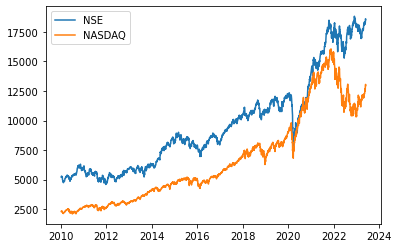

In [44]:
nse_price=(nse_data.High+nse_data.Low)/2
nasdaq_price=(nasdaq_data.High+nasdaq_data.Low)/2

plt.plot(nse_price, label='NSE')
plt.plot(nasdaq_price, label='NASDAQ')
plt.legend()
plt.show


In [19]:
# Set the rolling window size for correlation analysis
window = 30

# Compute the rolling correlation between lagged returns
rolling_corr = data['NASDAQ_Return'].rolling(window).corr(data['NSE_Return'])

# Analyze the leading or lagging behavior
consistent_lead = rolling_corr.mean() > 0.5
consistent_lag = rolling_corr.mean() < -0.5

if consistent_lead:
    behavior = "consistent leading behavior"
elif consistent_lag:
    behavior = "consistent lagging behavior"
else:
    behavior = "no consistent leading or lagging behavior"

# Print the analysis result
print("The data shows", behavior)
print("Average Rolling Correlation Coefficient:", rolling_corr.mean())

The data shows no consistent leading or lagging behavior
Average Rolling Correlation Coefficient: 0.1833120624589804


In [20]:
# Set the lag for the leading index
lead_lag = 'NASDAQ' 

# Shift the lagged returns based on the lead-lag relationship
data['Predictor_Return'] = data[lead_lag + '_Return'].shift(-1)

# Apply the trading strategy using the selected predictor
# Perform parameter optimization and evaluate performance


In [22]:
# Placeholder code for parameter optimization and performance evaluation
def trading_strategy(predictor):
    # Placeholder function for the trading strategy
    pass

# Apply the trading strategy with NASDAQ as the predictor
performance_nasdaq = trading_strategy(data['NASDAQ_Return'])

# Apply the trading strategy with NSE as the predictor
performance_nse = trading_strategy(data['NSE_Return'])

# Compare the performance of the trading strategies
if performance_nasdaq is not None and performance_nse is not None:
    if performance_nasdaq > performance_nse:
        selected_index = 'NASDAQ'
    else:
        selected_index = 'NSE'
else:
    selected_index = 'No Strategy'

# Print the selected index for parameter optimization
print("Selected Index for Parameter Optimization:", selected_index)

Selected Index for Parameter Optimization: No Strategy


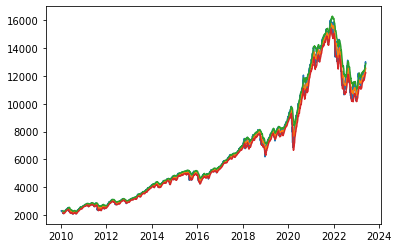

In [47]:
#Keltner Channel
import numpy as np
import matplotlib.pyplot as plt

True_range = pd.DataFrame([nasdaq_data.High - nasdaq_data.Low, abs(nasdaq_data.High - nasdaq_data.Close.shift(1)), abs(nasdaq_data.Low - nasdaq_data.Close.shift(1))]).max()
ATR = True_range.rolling(14).mean()
Middle = nasdaq_data['Close'].ewm(span = 20, min_periods = 20).mean()
upper = Middle + 2*ATR
lower = Middle - 2*ATR

plt.plot(nasdaq_data.Close)
plt.plot(Middle)
plt.plot(upper)
plt.plot(lower)

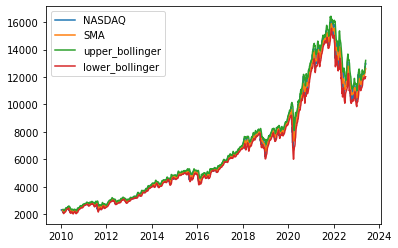

In [48]:
#bollinger band
SMA = nasdaq_data.Close.rolling(14).mean()
t_p = (nasdaq_data.High + nasdaq_data.Close + nasdaq_data.Low)/3
sd = t_p.rolling(20).std()
upper_bollinger = SMA + 2*sd
lower_bollinger = SMA - 2*sd

plt.plot(nasdaq_data.Close , label='NASDAQ')  
plt.plot(SMA,label='SMA')
plt.plot(upper_bollinger, label='upper_bollinger')
plt.plot(lower_bollinger, label='lower_bollinger')
plt.legend()

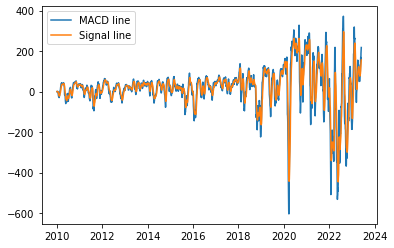

In [49]:
#MACD
MACD_line = nasdaq_data.Close.ewm(span = 12).mean() - nasdaq_data.Close.ewm(span = 26).mean()
Signal_line = MACD_line.ewm(span = 14).mean()
plt.plot(MACD_line, label='MACD line')
plt.plot(Signal_line, label='Signal line')
plt.legend()

(1.) Keltner Channel:

Optimized parameters: The middle line should be calculated using a 20-day EMA (Exponential Moving Average), and the average true range should be computed using a 10-day moving average.
Buy signal: It is generated when the price trend hits the lower line of the Keltner Channel.
Sell signal: It is generated when the price trend hits the upper line of the Keltner Channel.
(2.) Bollinger Bands:

Optimized parameters: The rolling period for Bollinger Bands should be set to 6 months, and the smoothing period (standard deviation) should be 50 days.
Buy signal: Similar to the Keltner Channel, a buy signal is generated when the price trend hits the lower Bollinger Band.
Sell signal: Similarly, a sell signal is generated when the price trend hits the upper Bollinger Band.
(3.) MACD (Moving Average Convergence Divergence):

Optimized parameters: The MACD line should be calculated as the difference between the 10-day and 21-day Exponential Moving Averages (EMAs). The signal line should be smoothed using a 20-day EMA.
Buy signal: It is generated when the MACD line crosses over the signal line.
Sell signal: Conversely, a sell signal is generated when the signal line crosses over the MACD line.

In [50]:
nse_data['macd_line'] = nse_data.Close.ewm(span = 10).mean() - nse_data.Close.ewm(span = 21).mean()
nse_data['signal_line'] = nse_data['macd_line'].ewm(span = 20).mean()

nse_data['Buy_Signal'] = np.where(nse_data['macd_line'] > nse_data['signal_line'], 1, 0)
nse_data['Sell_Signal'] = np.where(nse_data['macd_line'] < nse_data['signal_line'], 1, 0)
nse_data['daily_returns'] =(nse_data['Close']-nse_data['Open'])/nse_data['Open']
nse_data['D_R'] = np.where(nse_data['Buy_Signal'] >nse_data['Sell_Signal'], nse_data['daily_returns'], -nse_data['daily_returns'])
NSE_macd_cumulative_return= (nse_data['D_R'] + 1).product() -1

nse_data['cumulative_rolling_max'] = (nse_data['D_R'] + 1).cumprod()-1
drawdown = NSE_macd_cumulative_return - nse_data['cumulative_rolling_max']
NSE_macd_Max_drawdown = np.min(drawdown)

annual_returns= nse_data['D_R'].mean()*252
risk_free_rate = 0.035
annual_std_dev = nse_data['D_R'].std()*np.sqrt(252)
NSE_macd_Sharpe_ratio=(annual_returns-risk_free_rate) / annual_std_dev

print(NSE_macd_Max_drawdown)
print(NSE_macd_cumulative_return)
print(NSE_macd_Sharpe_ratio)

-0.5518578718485969
21.135420507694157
1.472047499421797


In [54]:

True_range = pd.DataFrame([nse_data.High - nse_data.Low, abs(nse_data.High - nse_data.Close.shift(1)), abs(nse_data.Low - nse_data.Close.shift(1))]).max()
nse_data['ATR'] = True_range.rolling(18).mean()
nse_data['Middle'] = nse_data['Close'].ewm(span=20, min_periods=20).mean()
nse_data['upper'] = nse_data['Middle'] + 2 * nse_data['ATR']
nse_data['lower'] = nse_data['Middle'] - 2 * nse_data['ATR']

nse_data['Buy_Signal'] = np.where(nse_data['Close'] < nse_data['lower'], 1, 0)
nse_data['Sell_Signal'] = np.where(nse_data['Close'] > nse_data['upper'], 1, 0)
nse_data['daily_returns'] = (nse_data['Close'] - nse_data['Open']) / nse_data['Open']
nse_data['D_R'] = np.where(nse_data['Buy_Signal'] > nse_data['Sell_Signal'], nse_data['daily_returns'], -nse_data['daily_returns'])
NSE_kc_cumulative_return = (nse_data['D_R'] + 1).product() - 1

nse_data['cumulative_rolling_max'] = (nse_data['D_R'] + 1).cumprod() - 1
drawdown = NSE_kc_cumulative_return - nse_data['cumulative_rolling_max']
NSE_kc_Max_drawdown = np.min(drawdown)

annual_returns = nse_data['D_R'].mean() * 252
risk_free_rate = 0.035
annual_std_dev = nse_data['D_R'].std() * np.sqrt(252)
NSE_kc_Sharpe_ratio = (annual_returns - risk_free_rate) / annual_std_dev

print("Max Drawdown:", NSE_kc_Max_drawdown)
print("Cumulative Return:", NSE_kc_cumulative_return)
print("Sharpe Ratio:", NSE_kc_Sharpe_ratio)

Max Drawdown: -0.844943113167197
Cumulative Return: -0.7613150838953304
Sharpe Ratio: -0.9235803047355289


In [58]:

nse_data['SMA'] = nse_data.Close.rolling(180).mean()
nse_data['t_p'] = (nse_data.Close + nse_data.High + nse_data.Low)/3
sd = nse_data.t_p.rolling(50).std()
nse_data['upper_bollinger'] = nse_data.SMA + 2*sd
nse_data['lower_bollinger'] = nse_data.SMA - 2*sd
nse_data['Buy_Signal'] = np.where(nse_data['Close'] < nse_data['lower_bollinger'], 1, 0)
nse_data['Sell_Signal'] = np.where(nse_data['Close'] > nse_data['upper_bollinger'], 1, 0)
nse_data['daily_returns'] =(nse_data['Close']-nse_data['Open'])/nse_data['Open']
nse_data['D_R'] = np.where(nse_data['Buy_Signal'] > nse_data['Sell_Signal'], nse_data['daily_returns'], -nse_data['daily_returns'])
NSE_bb_cumulative_return= (nse_data['D_R'] + 1).product() -1

nse_data['cumulative_rolling_max'] = (nse_data['D_R'] + 1).cumprod()-1
drawdown = NSE_bb_cumulative_return - nse_data['cumulative_rolling_max']
NSE_bb_Max_drawdown = np.min(drawdown)

annual_returns= nse_data['D_R'].mean()*252
risk_free_rate = 0.035
annual_std_dev = nse_data['D_R'].std()*np.sqrt(252)
NSE_bb_Sharpe_ratio=(annual_returns-risk_free_rate) / annual_std_dev

print(NSE_bb_Max_drawdown)
print(NSE_bb_cumulative_return)
print(NSE_bb_Sharpe_ratio)

-0.09404739875049328
0.2181582547858667
-0.06413006570348223
